<a href="https://colab.research.google.com/github/NehaKumari500092077/SAR-Data/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import Subset
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import torch.nn as nn

In [60]:
# The raw data URL is required to read the file directly from GitHub
excel_url = "https://github.com/NehaKumari500092077/SAR-Data/raw/main/sar_complex_data.xlsx"

# Read the Excel file into a pandas DataFrame
dataset = pd.read_excel(excel_url)

# Display the first 5 rows
display(dataset.head())

,sl,Latitude,Longitude,Real_VV,Imag_VV,Real_VH,Imag_VH,aspect,elevation,hillshade,slope,mv_(cm3/cm3),rms_(cm)
0,1,22.390783,87.326800,0.031546,0.392571,-0.122639,0.045552,115,28,174,2,0.234919,2.076179
1,2,22.390817,87.326767,0.262882,-0.511744,-0.059568,0.091104,115,28,174,2,0.241678,2.076179
2,3,22.390867,87.326783,0.262882,-0.511744,-0.059568,0.091104,180,29,180,1,0.243905,2.076179
3,4,22.390933,87.326900,0.112164,-0.091133,-0.021024,0.087600,180,29,180,1,0.244922,2.076179
4,5,22.391017,87.326833,0.084123,-0.241853,-0.045552,-0.164688,180,29,180,1,0.240829,2.076179


In [61]:
#rename and drop
dataset['s_moisture'] = dataset['mv_(cm3/cm3)']
dataset['s_roughness'] = dataset['rms_(cm)']
dataset.drop(columns=['mv_(cm3/cm3)', 'rms_(cm)', 'sl', 'Latitude', 'Longitude', 'aspect', 'elevation', 'hillshade', 'slope'], axis=1, inplace=True)
# Display the first 5 rows
display(dataset.head())

,Real_VV,Imag_VV,Real_VH,Imag_VH,s_moisture,s_roughness
0,0.031546,0.392571,-0.122639,0.045552,0.234919,2.076179
1,0.262882,-0.511744,-0.059568,0.091104,0.241678,2.076179
2,0.262882,-0.511744,-0.059568,0.091104,0.243905,2.076179
3,0.112164,-0.091133,-0.021024,0.087600,0.244922,2.076179
4,0.084123,-0.241853,-0.045552,-0.164688,0.240829,2.076179


In [62]:
# Save the DataFrame to a CSV file
dataset.to_csv('/content/sar_complex_data.csv', index=False)

#from google.colab import files
#files.download('/content/sar_complex_data.csv')

In [63]:
dataset = pd.read_csv('/content/sar_complex_data.csv')
# Display the first 5 rows
display(dataset.describe().round(4))

,Real_VV,Imag_VV,Real_VH,Imag_VH,s_moisture,s_roughness
count,638.0000,638.0000,638.0000,638.0000,638.0000,638.0000
mean,-0.0090,-0.0103,0.0019,-0.0019,0.1212,0.7752
std,0.2006,0.2066,0.1033,0.1095,0.1033,0.5558
min,-0.6273,-0.6238,-0.5080,-0.4996,0.0058,0.2100
25%,-0.1399,-0.1329,-0.0512,-0.0625,0.0364,0.2100
50%,-0.0136,-0.0035,0.0068,0.0000,0.0831,0.5700
75%,0.1286,0.1112,0.0629,0.0559,0.1930,1.0100
max,0.6951,0.6851,0.3578,0.3992,0.4789,2.0800


In [64]:
from sklearn.preprocessing import StandardScaler

# Identify the columns to normalize (all columns except the target variables)
# Assuming 's_moisture' and 's_roughness' are the target variables
columns_to_normalize = [col for col in dataset.columns if col not in ['s_moisture', 's_roughness']]

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply normalization to the selected columns
dataset[columns_to_normalize] = scaler.fit_transform(dataset[columns_to_normalize])

# Display the first few rows of the normalized data
display(dataset.head())


,Real_VV,Imag_VV,Real_VH,Imag_VH,s_moisture,s_roughness
0,0.202382,1.951342,-1.206121,0.433519,0.234919,2.076179
1,1.356553,-2.428749,-0.595240,0.849875,0.241678,2.076179
2,1.356553,-2.428749,-0.595240,0.849875,0.243905,2.076179
3,0.604597,-0.391501,-0.221925,0.817853,0.244922,2.076179
4,0.464695,-1.121518,-0.459491,-1.488133,0.240829,2.076179


In [65]:
# Display the first few rows of the descriptive statistics
display(dataset.describe().round(4))

,Real_VV,Imag_VV,Real_VH,Imag_VH,s_moisture,s_roughness
count,638.0000,638.0000,638.0000,638.0000,638.0000,638.0000
mean,-0.0000,-0.0000,-0.0000,0.0000,0.1212,0.7752
std,1.0008,1.0008,1.0008,1.0008,0.1033,0.5558
min,-3.0845,-2.9717,-4.9388,-4.5493,0.0058,0.2100
25%,-0.6528,-0.5937,-0.5140,-0.5543,0.0364,0.2100
50%,-0.0230,0.0330,0.0477,0.0172,0.0831,0.5700
75%,0.6868,0.5885,0.5910,0.5282,0.1930,1.0100
max,3.5131,3.3684,3.4476,3.6660,0.4789,2.0800


In [66]:
# Get the shape of the DataFrame (rows, columns)
num_rows, num_cols = dataset.shape

print(f"Total number of data points (rows): {num_rows}")
print(f"Total number of columns (features + targets): {num_cols}")


# Assuming 's_moisture' and 's_roughness' are the target variables
num_features = num_cols - 2 # Subtract the two target columns

print(f"Total number of features (excluding targets): {num_features}")

Total number of data points (rows): 638
Total number of columns (features + targets): 6
Total number of features (excluding targets): 4


,Real_VV,Imag_VV,Real_VH,Imag_VH,s_moisture,s_roughness
Real_VV,1.000000,0.011172,-0.056259,0.016275,-0.010054,0.019642
Imag_VV,0.011172,1.000000,0.019766,-0.016966,0.016656,0.012867
Real_VH,-0.056259,0.019766,1.000000,0.072103,-0.013553,-0.022531
Imag_VH,0.016275,-0.016966,0.072103,1.000000,-0.029400,-0.049182
s_moisture,-0.010054,0.016656,-0.013553,-0.029400,1.000000,-0.214778
s_roughness,0.019642,0.012867,-0.022531,-0.049182,-0.214778,1.000000


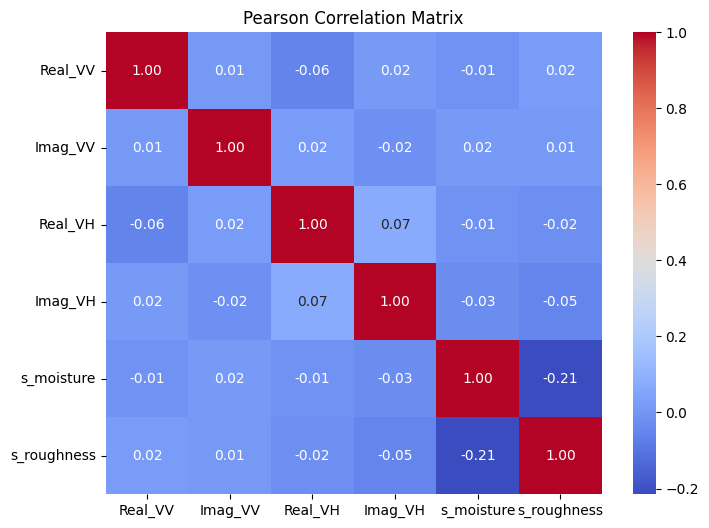

In [69]:
# Calculate the Pearson correlation matrix
correlation_matrix = dataset.corr(method='pearson')

# Display the correlation matrix
display(correlation_matrix)

# Optionally, visualize the correlation matrix using a heatmap for better understanding
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix')
plt.show()

The Pearson correlation analysis suggests that the individual SAR polarization values (Real_VV, Imag_VV, Real_VH, Imag_VH) have very weak linear correlations with both soil moisture and soil roughness in this dataset.

Generating scatter plots for s_moisture...


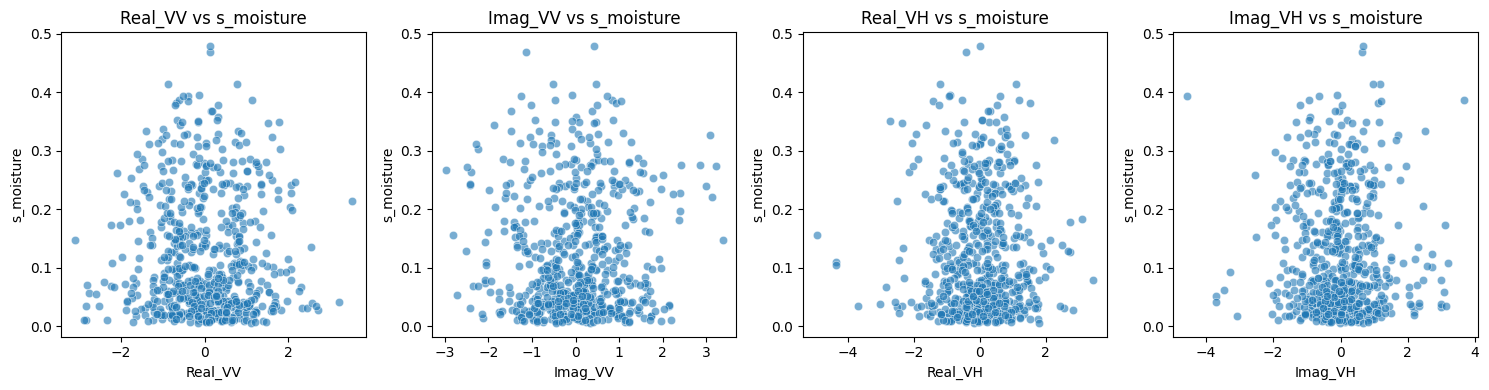

Generating scatter plots for s_roughness...


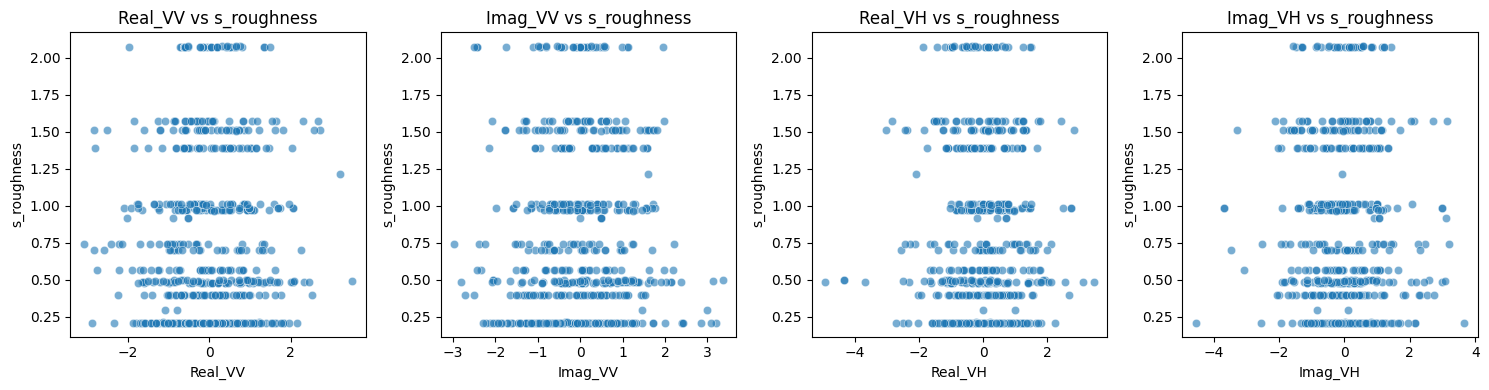

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

features_list = ['Real_VV', 'Imag_VV', 'Real_VH', 'Imag_VH']
targets_list = ['s_moisture', 's_roughness']

# Create scatter plots for each feature against each target variable
for target in targets_list:
    print(f"Generating scatter plots for {target}...")
    plt.figure(figsize=(15, 4)) # Adjust figure size as needed

    for i, feature in enumerate(features_list):
        plt.subplot(1, len(features_list), i + 1) # Create subplots
        sns.scatterplot(data=dataset, x=feature, y=target, alpha=0.6)
        plt.title(f'{feature} vs {target}')
        plt.xlabel(feature)
        plt.ylabel(target)

    plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
    plt.show()

 scatter plots of each of your features (Real_VV, Imag_VV, Real_VH, Imag_VH) against your target variables (s_moisture and s_roughness).

  the individual SAR polarization features (Real_VV, Imag_VV, Real_VH, Imag_VH) do not appear to have strong individual linear or simple non-linear relationships with s_moisture or s_roughness in this dataset.

In [68]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variables (y)
# Assuming 's_moisture' and 's_roughness' are the target variables
features = dataset.drop(columns=['s_moisture', 's_roughness'])
targets = dataset[['s_moisture', 's_roughness']]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42) # Using a random_state for reproducibility

# Print the shapes of the resulting sets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (510, 4)
Shape of X_test: (128, 4)
Shape of y_train: (510, 2)
Shape of y_test: (128, 2)


Polynomial regression \\
Degree 2: MSE = 0.1467, R2 = -0.0320

Degree 3: MSE = 0.1511, R2 = -0.0610

Degree 4: MSE = 0.2373, R2 = -0.6004

In [82]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Create Polynomial Features
# You can experiment with different degrees (e.g., degree=2, degree=3)
degree = 4 # Increased degree
polynomial_transformer = PolynomialFeatures(degree=degree, include_bias=False) # include_bias=False to avoid an extra column of ones

# Fit and transform the training features
X_train_poly = polynomial_transformer.fit_transform(X_train)

# Transform the testing features (do NOT fit again on the test set)
X_test_poly = polynomial_transformer.transform(X_test)

print(f"Original number of features: {X_train.shape[1]}")
print(f"Number of polynomial features (degree={degree}): {X_train_poly.shape[1]}")

# Step 2: Train a Linear Regression Model on Polynomial Features
model = LinearRegression()

# Train the model using the polynomial training data
model.fit(X_train_poly, y_train)

# Step 3: Make Predictions on the Polynomial Testing Features
y_pred = model.predict(X_test_poly)

# Display the first few predictions and the corresponding true values
print("\nFirst 5 predictions and true values:")
for i in range(5):
    print(f"Prediction: {y_pred[i].round(4)}, True: {y_test.iloc[i].values.round(4)}")

# Step 4: Evaluate the Model (Optional but recommended)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error (MSE): {mse:.4f}")

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2:.4f}")

Original number of features: 4
Number of polynomial features (degree=4): 69

First 5 predictions and true values:
Prediction: [0.0398 0.5945], True: [0.1245 0.5   ]
Prediction: [0.1083 0.8302], True: [0.0708 1.01  ]
Prediction: [0.1576 0.9645], True: [0.098 1.51 ]
Prediction: [0.0977 0.9198], True: [0.2797 0.21  ]
Prediction: [0.1895 0.6867], True: [0.313 0.21 ]

Mean Squared Error (MSE): 0.2373
R-squared (R2): -0.6004


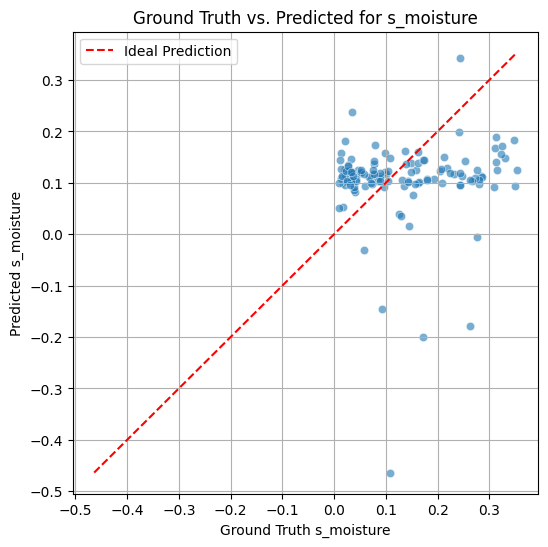

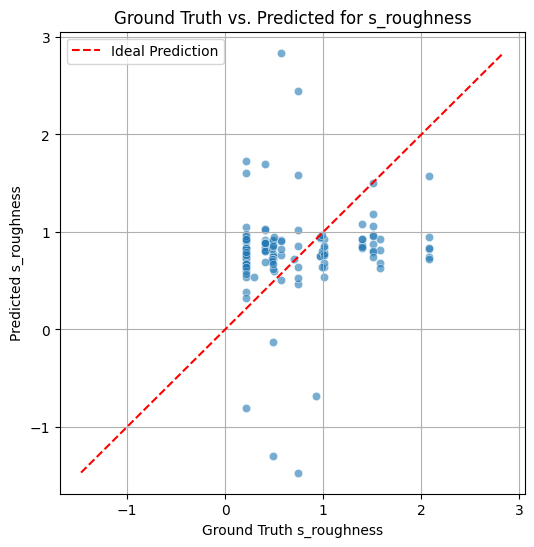

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred are available from the previous step
# y_test is a pandas DataFrame, y_pred is a numpy array

targets_list = ['s_moisture', 's_roughness']

# Create scatter plots for ground truth vs. predictions for each target
for i, target in enumerate(targets_list):
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test[target], y=y_pred[:, i], alpha=0.6)

    # Add a diagonal line representing perfect predictions
    min_val = min(y_test[target].min(), y_pred[:, i].min())
    max_val = max(y_test[target].max(), y_pred[:, i].max())
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Prediction')

    plt.title(f'Ground Truth vs. Predicted for {target}')
    plt.xlabel(f'Ground Truth {target}')
    plt.ylabel(f'Predicted {target}')
    plt.legend()
    plt.grid(True)
    plt.show()

Ridge or Lasso Regression:

alpha=1.0: MSE = 0.1497, R2 = -0.0221

alpha=0.1: MSE = 0.1497, R2 = -0.0221

alpha=10.0: MSE = 0.1497, R2 = -0.0220

 tuning the alpha parameter within a reasonable range for Ridge Regression is not significantly improving the model's ability to predict s_moisture and s_roughness with this dataset and these features.

In [89]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Step 2 & 3: Train and Evaluate Ridge Regression Model

# Initialize the Ridge Regression model
# You can experiment with the 'alpha' hyperparameter (regularization strength)
ridge_model = Ridge(alpha=10.0) # Larger alpha value

# Train the model
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("--- Ridge Regression Results (alpha=10.0) ---")
print(f"Mean Squared Error (MSE): {mse_ridge:.4f}")
print(f"R-squared (R2): {r2_ridge:.4f}")

# Display the first few predictions and true values
print("\nFirst 5 predictions and true values:")
for i in range(5):
    print(f"Prediction: {y_pred_ridge[i].round(4)}, True: {y_test.iloc[i].values.round(4)}")

--- Ridge Regression Results (alpha=10.0) ---
Mean Squared Error (MSE): 0.1497
R-squared (R2): -0.0220

First 5 predictions and true values:
Prediction: [0.1106 0.7307], True: [0.1245 0.5   ]
Prediction: [0.1187 0.8169], True: [0.0708 1.01  ]
Prediction: [0.1265 0.8115], True: [0.098 1.51 ]
Prediction: [0.1188 0.8018], True: [0.2797 0.21  ]
Prediction: [0.1261 0.7689], True: [0.313 0.21 ]


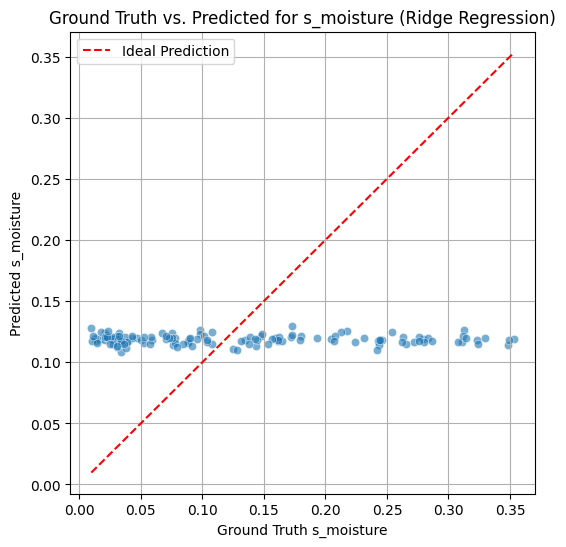

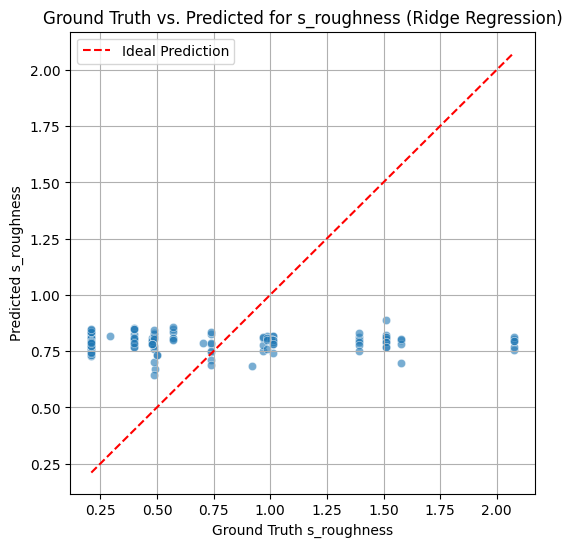

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming y_test and y_pred_ridge are available from the previous step
# y_test is a pandas DataFrame, y_pred_ridge is a numpy array

targets_list = ['s_moisture', 's_roughness']

# Create scatter plots for ground truth vs. predictions for each target
for i, target in enumerate(targets_list):
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test[target], y=y_pred_ridge[:, i], alpha=0.6)

    # Add a diagonal line representing perfect predictions
    min_val = min(y_test[target].min(), y_pred_ridge[:, i].min())
    max_val = max(y_test[target].max(), y_pred_ridge[:, i].max())
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Prediction')

    plt.title(f'Ground Truth vs. Predicted for {target} (Ridge Regression)')
    plt.xlabel(f'Ground Truth {target}')
    plt.ylabel(f'Predicted {target}')
    plt.legend()
    plt.grid(True)
    plt.show()

DecisionTreeRegressor

Default Decision Tree: MSE = 0.2608, R2 = -0.9173

Decision Tree (max_depth=3): MSE = 0.1679, R2 = -0.0901

Decision Tree (max_depth=5): MSE = 0.1702, R2 = -0.1521

Decision Tree (max_depth=10): MSE = 0.2277, R2 = -0.4750

Polynomial Regression (Degree 2): MSE = 0.1467, R2 = -0.0320

Ridge Regression (alpha=10.0): MSE = 0.1497, R2 = -0.0220

In [95]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 2 & 3: Train and Evaluate Decision Tree Regressor Model

# Initialize the Decision Tree Regressor model
# You can experiment with hyperparameters like max_depth, min_samples_split, etc.
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42) # Using random_state for reproducibility

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("--- Decision Tree Regressor Results (max_depth=3) ---")
print(f"Mean Squared Error (MSE): {mse_dt:.4f}")
print(f"R-squared (R2): {r2_dt:.4f}")

# Display the first few predictions and true values
print("\nFirst 5 predictions and true values:")
for i in range(5):
    print(f"Prediction: {y_pred_dt[i].round(4)}, True: {y_test.iloc[i].values.round(4)}")

--- Decision Tree Regressor Results (max_depth=3) ---
Mean Squared Error (MSE): 0.1702
R-squared (R2): -0.1521

First 5 predictions and true values:
Prediction: [0.1669 0.4086], True: [0.1245 0.5   ]
Prediction: [0.1096 0.8198], True: [0.0708 1.01  ]
Prediction: [0.1395 0.4516], True: [0.098 1.51 ]
Prediction: [0.1096 0.8198], True: [0.2797 0.21  ]
Prediction: [0.1395 0.4516], True: [0.313 0.21 ]


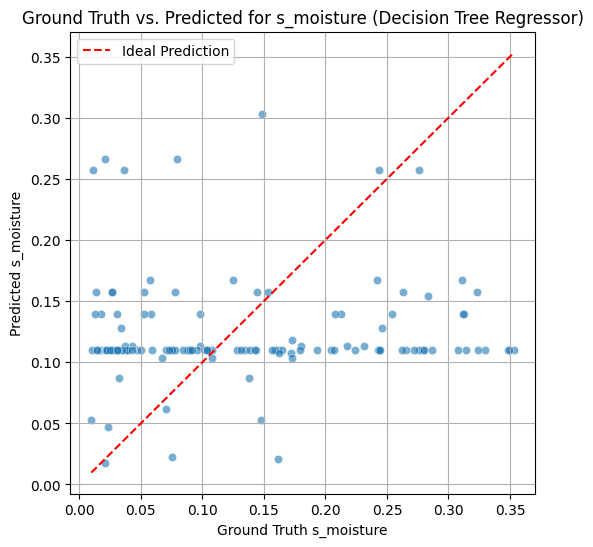

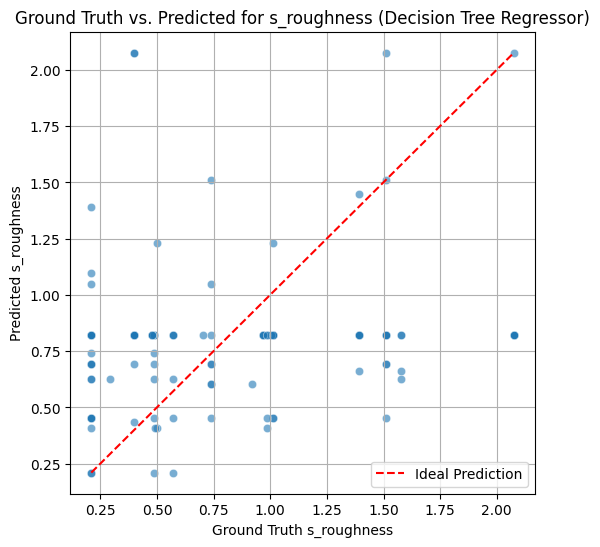

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming y_test and y_pred_dt are available from the previous step
# y_test is a pandas DataFrame, y_pred_dt is a numpy array

targets_list = ['s_moisture', 's_roughness']

# Create scatter plots for ground truth vs. predictions for each target
for i, target in enumerate(targets_list):
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test[target], y=y_pred_dt[:, i], alpha=0.6)

    # Add a diagonal line representing perfect predictions
    min_val = min(y_test[target].min(), y_pred_dt[:, i].min())
    max_val = max(y_test[target].max(), y_pred_dt[:, i].max())
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Prediction')

    plt.title(f'Ground Truth vs. Predicted for {target} (Decision Tree Regressor)')
    plt.xlabel(f'Ground Truth {target}')
    plt.ylabel(f'Predicted {target}')
    plt.legend()
    plt.grid(True)
    plt.show()

 **Decision Tree Regressor**



*   Decision Tree Regressor (Default - max_depth=None):

    Mean Squared Error (MSE): 0.2608

    R-squared (R2): -0.9173

    Comment: Very poor performance, likely due to overfitting on the training
    data when allowed to grow fully.

*   Decision Tree Regressor (max_depth=3):

    Mean Squared Error (MSE): 0.1679

    R-squared (R2): -0.0901

    Comment: Significant improvement over the default, suggesting that limiting depth helped reduce overfitting. Still a negative R-squared.


*   Decision Tree Regressor (max_depth=5):

    Mean Squared Error (MSE): 0.1702

    R-squared (R2): -0.1521

    Comment: Slightly worse performance than max_depth=3.

*   Decision Tree Regressor (max_depth=10):

    Mean Squared Error (MSE): 0.2277

    R-squared (R2): -0.4750

    Comment: Performance worsened again compared to max_depth=3 and max_depth=5, indicating that a depth of 10 might still be too complex and causing some overfitting.

    
Conclusion for Decision Tree Regressor: Among the max_depth values tried, max_depth=3 yielded the best performance, but even this tuned Decision Tree model did not perform well, with a negative R-squared score. This suggests that a single Decision Tree, even with basic depth tuning, might not be the most suitable model for this dataset compared to others

In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 2 & 3: Train and Evaluate Random Forest Regressor Model

# Initialize the Random Forest Regressor model
# You can experiment with hyperparameters like n_estimators, max_depth, etc.
rf_model = RandomForestRegressor(random_state=42) # Using random_state for reproducibility

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("--- Random Forest Regressor Results ---")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"R-squared (R2): {r2_rf:.4f}")

# Display the first few predictions and true values
print("\nFirst 5 predictions and true values:")
for i in range(5):
    print(f"Prediction: {y_pred_rf[i].round(4)}, True: {y_test.iloc[i].values.round(4)}")

--- Random Forest Regressor Results ---
Mean Squared Error (MSE): 0.1237
R-squared (R2): 0.0716

First 5 predictions and true values:
Prediction: [0.0856 0.6263], True: [0.1245 0.5   ]
Prediction: [0.1017 0.7111], True: [0.0708 1.01  ]
Prediction: [0.1114 0.9732], True: [0.098 1.51 ]
Prediction: [0.1437 0.6457], True: [0.2797 0.21  ]
Prediction: [0.1313 0.505 ], True: [0.313 0.21 ]


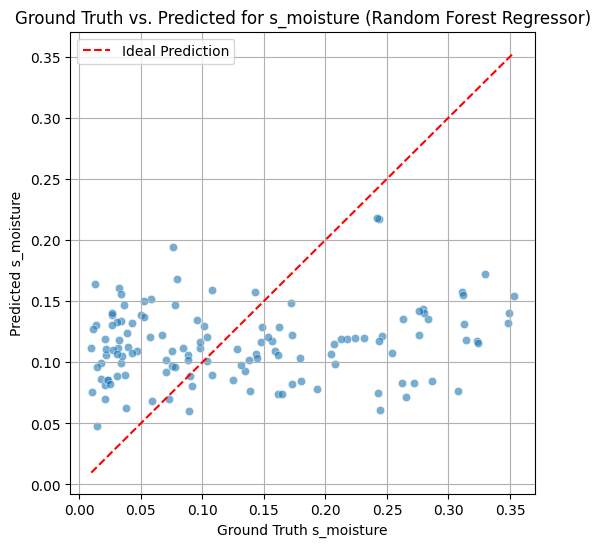

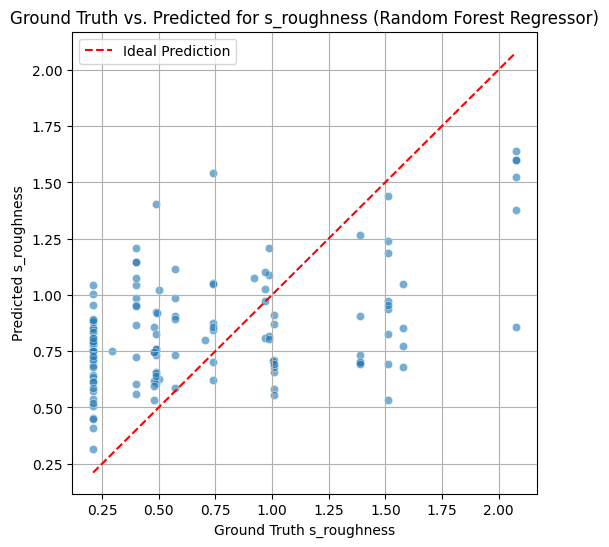

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming y_test and y_pred_rf are available from the previous step
# y_test is a pandas DataFrame, y_pred_rf is a numpy array

targets_list = ['s_moisture', 's_roughness']

# Create scatter plots for ground truth vs. predictions for each target
for i, target in enumerate(targets_list):
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test[target], y=y_pred_rf[:, i], alpha=0.6)

    # Add a diagonal line representing perfect predictions
    min_val = min(y_test[target].min(), y_pred_rf[:, i].min())
    max_val = max(y_test[target].max(), y_pred_rf[:, i].max())
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Prediction')

    plt.title(f'Ground Truth vs. Predicted for {target} (Random Forest Regressor)')
    plt.xlabel(f'Ground Truth {target}')
    plt.ylabel(f'Predicted {target}')
    plt.legend()
    plt.grid(True)
    plt.show()

**Key Hyperparameters of Gradient Boosting**

**n_estimators:** The number of boosting stages (i.e., the number of trees) to perform. Increasing this can improve performance but also increases training time and the risk of overfitting. Default is 100.

**learning_rate:** Controls the step size shrinkage used in the contribution of each tree. A smaller learning_rate requires more n_estimators but can lead to a more robust model. Default is 0.1.

**max_depth:** The maximum depth of the individual regression estimators (trees). Limits the complexity of the individual trees. Default is 3.

**min_samples_split:** The minimum number of samples required to split an internal node. Can be an integer or a fraction.

**min_samples_leaf:** The minimum number of samples required to be at a leaf node. Can be an integer or a fraction.

**max_features: **The number of features to consider when looking for the best split. Can be an integer, float, "auto", "sqrt", "log2", or None.

**subsample:** The fraction of samples to be used for fitting the individual base learners. Values less than 1.0 introduce randomness and can help prevent overfitting. Default is 1.0.

**random_state:** Controls the random seed for reproducibility. (Used in the code to ensure consistent results.)

In [108]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 2 & 3: Train and Evaluate Gradient Boosting Regressor Models (Separate for each target)

# --- Model for s_moisture ---
print("--- Training and Evaluating Gradient Boosting Regressor for s_moisture ---")
gbr_moisture_model = GradientBoostingRegressor(random_state=42) # Using random_state for reproducibility

# Train the model for s_moisture
gbr_moisture_model.fit(X_train, y_train['s_moisture'])

# Make predictions for s_moisture on the test set
y_pred_moisture_gbr = gbr_moisture_model.predict(X_test)

# Evaluate the s_moisture model
mse_moisture_gbr = mean_squared_error(y_test['s_moisture'], y_pred_moisture_gbr)
r2_moisture_gbr = r2_score(y_test['s_moisture'], y_pred_moisture_gbr)

print(f"Mean Squared Error (MSE) for s_moisture: {mse_moisture_gbr:.4f}")
print(f"R-squared (R2) for s_moisture: {r2_moisture_gbr:.4f}")

# --- Model for s_roughness ---
print("\n--- Training and Evaluating Gradient Boosting Regressor for s_roughness ---")
gbr_roughness_model = GradientBoostingRegressor(random_state=42) # Using random_state for reproducibility

# Train the model for s_roughness
gbr_roughness_model.fit(X_train, y_train['s_roughness'])

# Make predictions for s_roughness on the test set
y_pred_roughness_gbr = gbr_roughness_model.predict(X_test)

# Evaluate the s_roughness model
mse_roughness_gbr = mean_squared_error(y_test['s_roughness'], y_pred_roughness_gbr)
r2_roughness_gbr = r2_score(y_test['s_roughness'], y_pred_roughness_gbr)

print(f"Mean Squared Error (MSE) for s_roughness: {mse_roughness_gbr:.4f}")
print(f"R-squared (R2) for s_roughness: {r2_roughness_gbr:.4f}")

# Combine predictions into a single array for potential visualization later
# Note: This assumes the order of targets is consistent (s_moisture, s_roughness)
y_pred_gbr = np.column_stack((y_pred_moisture_gbr, y_pred_roughness_gbr))

--- Training and Evaluating Gradient Boosting Regressor for s_moisture ---
Mean Squared Error (MSE) for s_moisture: 0.0110
R-squared (R2) for s_moisture: -0.0861

--- Training and Evaluating Gradient Boosting Regressor for s_roughness ---
Mean Squared Error (MSE) for s_roughness: 0.2492
R-squared (R2) for s_roughness: 0.1156


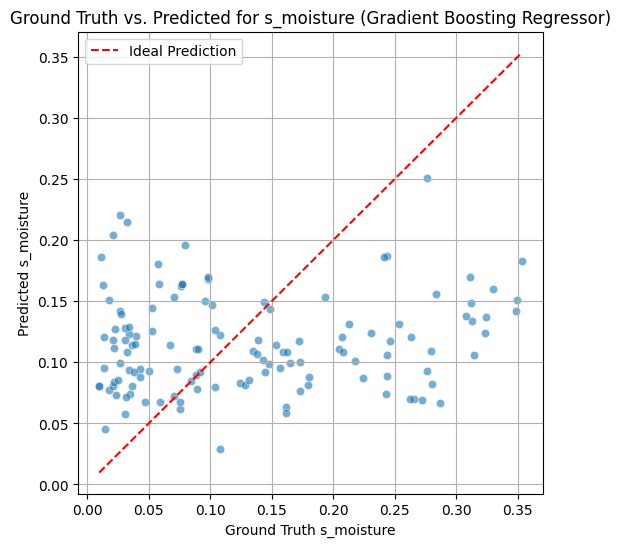

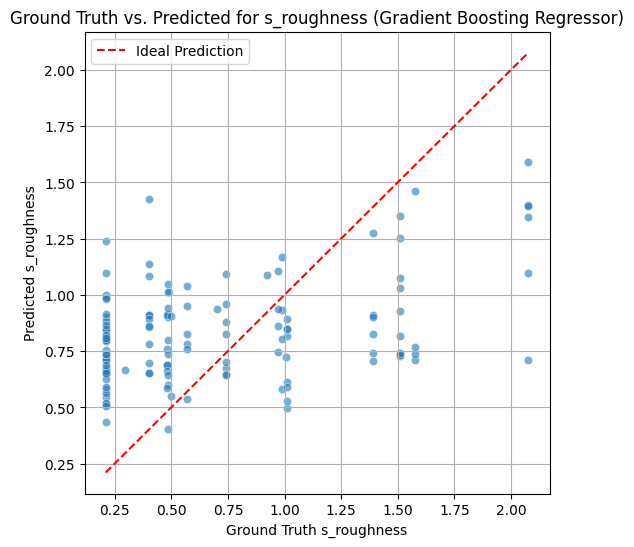

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming y_test and y_pred_gbr are available from the previous step
# y_test is a pandas DataFrame, y_pred_gbr is a numpy array (combined predictions)

targets_list = ['s_moisture', 's_roughness']

# Create scatter plots for ground truth vs. predictions for each target
for i, target in enumerate(targets_list):
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test[target], y=y_pred_gbr[:, i], alpha=0.6)

    # Add a diagonal line representing perfect predictions
    min_val = min(y_test[target].min(), y_pred_gbr[:, i].min())
    max_val = max(y_test[target].max(), y_pred_gbr[:, i].max())
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Prediction')

    plt.title(f'Ground Truth vs. Predicted for {target} (Gradient Boosting Regressor)')
    plt.xlabel(f'Ground Truth {target}')
    plt.ylabel(f'Predicted {target}')
    plt.legend()
    plt.grid(True)
    plt.show()

In [110]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

# Define the parameter grid for Grid Search
# We'll try different combinations of n_estimators, learning_rate, and max_depth
param_grid_gbr = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2], # Step size shrinkage
    'max_depth': [3, 4, 5],            # Maximum depth of individual trees
}

# Initialize the Gradient Boosting Regressor model
# Use the same random_state for reproducibility
gbr_moisture_base = GradientBoostingRegressor(random_state=42)

# Define the scoring metric (using negative MSE because GridSearchCV tries to maximize the score)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Initialize GridSearchCV
# cv=5 means 5-fold cross-validation
grid_search_moisture = GridSearchCV(
    estimator=gbr_moisture_base,
    param_grid=param_grid_gbr,
    scoring=mse_scorer, # Use the negative MSE scorer
    cv=5,
    n_jobs=-1, # Use all available CPU cores
    verbose=1 # Print progress
)

print("Performing Grid Search for s_moisture...")

# Fit GridSearchCV to the training data for s_moisture
# y_train['s_moisture'] is a 1D Series, as required by GradientBoostingRegressor
grid_search_moisture.fit(X_train, y_train['s_moisture'])

# Print the best hyperparameters found
print("\nBest hyperparameters for s_moisture:")
print(grid_search_moisture.best_params_)

# Print the best cross-validation score (negative MSE)
print("\nBest cross-validation MSE for s_moisture:")
print(-grid_search_moisture.best_score_) # Print as positive MSE

# Optionally, get the best model and evaluate on the test set
best_gbr_moisture_model = grid_search_moisture.best_estimator_
y_pred_moisture_tuned = best_gbr_moisture_model.predict(X_test)
test_mse_moisture_tuned = mean_squared_error(y_test['s_moisture'], y_pred_moisture_tuned)
test_r2_moisture_tuned = r2_score(y_test['s_moisture'], y_pred_moisture_tuned)

print("\nPerformance of the best s_moisture model on the test set:")
print(f"Mean Squared Error (MSE): {test_mse_moisture_tuned:.4f}")
print(f"R-squared (R2): {test_r2_moisture_tuned:.4f}")

Performing Grid Search for s_moisture...
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best hyperparameters for s_moisture:
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}

Best cross-validation MSE for s_moisture:
0.010634814331149026

Performance of the best s_moisture model on the test set:
Mean Squared Error (MSE): 0.0102
R-squared (R2): -0.0018
